Regression Training and Testing - Practical Machine Learning Tutorial with Python p.5
========

Original video on Sentdex's Youtube Channel: https://www.youtube.com/watch?v=QLVMqwpOLPk

Support his awesome content: https://www.pythonprogramming.net/


In [32]:
import pandas as pd
import quandl
import math 
import numpy as np
from sklearn import preprocessing, model_selection, svm 
from sklearn.linear_model import LinearRegression

#New imports for this lesson: 
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

Code from last time, plus some edits he makes right away. Follow along in the video, and I'll update to the final code.

In [36]:
df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

The majority of the updates are here: 

In [37]:
X = np.array(df.drop(['label'],1))

# He adds these lines, and then realizes that he needs to scale them before he creates X and X_lately
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
#He has this next line twice in the video. He ends up noticing it in pt. 6, and deletes the second one. 
y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs = 0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
# Uncomment the next line, if you want to see the accuracy printed out...
#print(accuracy)

Start making our predictions. Note that he initially types "confidence" instead of "accuracy"

In [38]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1076.19079982 1090.74288447 1104.61885455 1099.20765827 1092.75238453
 1090.12520206 1088.47493689 1085.43151653 1079.3541202  1075.01375707
 1072.64921068 1092.33054304 1110.71894744 1115.07690235 1129.93472678
 1133.9344812  1132.50978872 1130.03722766 1131.79378623 1150.34500277
 1149.58691835 1159.33614786 1155.95065241 1163.71326338 1184.18348906
 1196.40005825 1190.79480974 1202.58686046 1208.0784093  1206.36443806
 1197.13159926 1202.53997641 1201.31356882 1137.06380364 1084.53348175] 0.9783776898796447 35


Let's plot the data to see what it looks like. Note that I put the style declaration here instead of at the top. 

In [39]:
style.use('ggplot')

We fill the Forecast column initially with the NaN from numpy.

In [40]:
df['Forecast'] = np.nan

We find out what the last date was, and then find the next day. 

In [41]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

For loop to go through each element of the forecast set. Iterating through the forecast set, taking each forecast and day, and setting those as the values in the dataframe, making the future features NaN. He goes through this pretty quickly, so you might need to look it over. 

In [42]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

Plotting the data. We add the 'Adj. Close'and the 'Forecast' series to the plot. Set up the legends, and then show. 

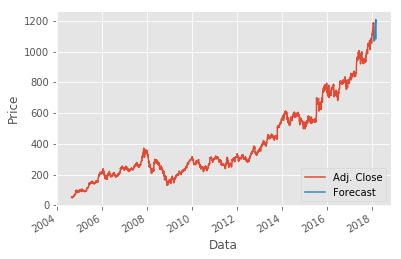

In [43]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()

He talks for a few minutes at the end of the video about the for loop above. 

That's it for this lesson!
----
On to the next video: https://www.youtube.com/watch?v=za5s7RB_VLw